In [61]:
# Importing useful libraries
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import datetime
import plotly.express as px
import seaborn as sns
import time
import re
from datetime import timedelta


In [2]:
# Importing the first dataset "author" in a dataframe called authors to work on it

file_path_authors = "./lighter_authors.json"
ch_size = 100
dfs = []

chunks = pd.read_json(file_path_authors, lines = True, chunksize=1000)

# Read columns' names
for chunk in chunks:
    chunk.info()
    break

with open(file_path_authors, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = 1000):
        dfs.append(ch)

authors = pd.concat(dfs, ignore_index = True)

authors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratings_count       1000 non-null   int64  
 1   average_rating      1000 non-null   float64
 2   text_reviews_count  1000 non-null   int64  
 3   work_ids            1000 non-null   object 
 4   book_ids            1000 non-null   object 
 5   works_count         1000 non-null   int64  
 6   id                  1000 non-null   int64  
 7   name                1000 non-null   object 
 8   gender              1000 non-null   object 
 9   image_url           1000 non-null   object 
 10  about               1000 non-null   object 
 11  fans_count          1000 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
5,436635,3.78,26193,"[1959512, 132919, 1652564, 4708346, 2536975, 3...","[53835, 5246, 17728, 212525, 26950, 269528, 85...",1001,16,Edith Wharton,female,https://images.gr-assets.com/authors/148451223...,Edith Newbold Jones was born into such wealth ...,3179
6,46,4.59,21,"[4420, 21232, 1057034, 21226, 1057032, 21228, ...","[49, 20035, 1070349, 20029, 1070347, 20031, 20...",36,17,Luther Butler,male,https://images.gr-assets.com/authors/118568379...,"<a target=""_blank"" rel=""noopener nofollow"" hre...",10
7,503435,3.79,34364,"[1158125, 241811, 6815, 3182664, 6813, 7000800...","[50, 141372, 2915, 141371, 2913, 6795756, 6694...",226,18,Gary Paulsen,male,https://images.gr-assets.com/authors/159591484...,"Although he was never a dedicated student, Pau...",2636
8,6392,3.66,631,"[6398423, 21178, 1931660, 13273040, 189082, 24...","[6217775, 19979, 19983, 8325686, 195506, 19551...",26,20,Dale Peck,,https://images.gr-assets.com/authors/124562693...,"Dale Peck (born 1967 on Long Island, New York)...",99
9,100211,4.00,3650,"[1705297, 7294256, 507563, 21108, 21109, 21115...","[1708127, 7044446, 519655, 19909, 19910, 19916...",99,23,Angela Knight,,https://images.gr-assets.com/authors/122559957...,Angela Knight is an American author of mostly ...,963


In [63]:
chunks = pd.read_json("./lighter_books.json", lines = True, chunksize=1000)

good_columns  = []  # list with the columns' names

for chunk in chunks:
    good_columns  = chunk.columns.tolist()
    break

# print(good_columns)

# Importing only the interesting columns from the dataset "books" to solve the exercise

file_path_books = "./lighter_books.json"
ch_size = 10000
dfs = []

with open(file_path_books, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = 1000):
        ch = ch[["id", "title", "author_id", "author_name", "series_name", "series_id", "series_position", "format",
                "original_publication_date", "work_id", "average_rating", "text_reviews_count", "language","rating_dist",
                "ratings_count", "original_publication_date", "edition_information","publisher","num_pages"]]
        # selecting only the useful columns
        dfs.append(ch)


books = pd.concat(dfs, ignore_index = True)

In [64]:
books_cleaned = books.drop_duplicates(subset=['title', 'author_id', 'series_id', 'series_position'], keep = "first")
books_cleaned = books_cleaned.drop_duplicates(subset = ['work_id'])
books_cleaned = books_cleaned[books_cleaned['title'] != ""]
books_cleaned = books_cleaned[books_cleaned['author_id'] != ""]
books_cleaned = books_cleaned[books_cleaned['author_name'] != "NOT A BOOK"]


In [65]:
print(books.shape[0])
print(books_cleaned.shape[0])

7027431
2630842


## [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.



* Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?


We start by importing the useful columns of the 2 datasets to work properly on it and to store less memory.

In [29]:
df_5_b_2 = books_cleaned[["id", "title", "author_id", "author_name", "series_name", "series_id", "series_position", "format", "original_publication_date", "work_id", "average_rating", "text_reviews_count"]]

Plotting the 10 most influential authors regarding their fan_count. We use the dataset "authors".

In [30]:
df_sorted_fc = authors.sort_values(by=authors.columns[11], ascending = False)

fc_columns = df_sorted_fc.iloc[:, [6, 7, 11]]


most_influent_authors = dict()
count = 0

for i, j in zip(fc_columns["name"], fc_columns["id"]):
    most_influent_authors[i] = j
    count += 1
    if count == 10:
        break

most_influent_authors
fc_columns.head(10) # to print only the first 10.


,id,name,fans_count
1017,3389,Stephen King,766035
169374,4039811,Veronica Roth,455358
6397,23470,Bill Gates,446876
205870,5430144,Colleen Hoover,356633
4537,15872,Rick Riordan,339346
1161,3780,James Patterson,317040
100166,1406384,John Green,282537
3818,12855,Neil deGrasse Tyson,277850
27110,150038,Cassandra Clare,238560
32358,194416,Mindy Kaling,234647


Let's work on cleaning up the dataset with respect to the publication date, as it contains various date formats that need to be standardized for a better analysis.




In [31]:
# Work on the data_frame to fix the variable publication_date and create a new column formatted as "%Y-%m-%d"

opd_column = df_5_b_2["original_publication_date"]
opd_column_formatted = []

for i in opd_column:
    if len(i) in [4, 7, 10]:
        if len(i) == 4:
            i += "-01-01"

        if len(i) == 7:
            i += "-01"
        try:
            format = "%Y-%m-%d"
            timestamp_formattato = datetime.datetime.strptime(i, format)
            opd_column_formatted.append(timestamp_formattato)
        except ValueError as ve:
            opd_column_formatted.append(pd.NaT)
    else:
        opd_column_formatted.append(pd.NaT)

df_5_b_2['opd_column_formatted'] = opd_column_formatted

Let's also clean 'original_publication_date' column deleting outliers.

We have chosen to remove outliers using the 1st percentile as the lower limit and today's date as the upper limit. However, there are different ways to implement this procedure.

In [32]:
df_5_b_2['opd_column_formatted'] = pd.to_datetime(df_5_b_2['opd_column_formatted'], errors='coerce')

Q_01 = df_5_b_2['opd_column_formatted'].quantile(0.01)

# Calculate the limits for outliers
lower_limit = pd.to_datetime(Q_01)
upper_limit = pd.to_datetime("2023-11-02 00:00:00")

# Filter the DataFrame to remove outliers
df_5_b_2 = df_5_b_2[(df_5_b_2['opd_column_formatted'] >= lower_limit) & (df_5_b_2['opd_column_formatted'] <= upper_limit)]

In [33]:
# Count unique works_id for every author_id
count_work_id = df_5_b_2.groupby('author_id')['work_id'].nunique()

# Get the result as dataframe
result_df = count_work_id.reset_index()

# Rename columns
result_df.columns = ['author_id', 'num_works']

result_df = result_df.merge(df_5_b_2[['author_id', 'author_name']].drop_duplicates(), on='author_id', how='left')

result_df_books = result_df.sort_values(by='num_works', ascending=False)

result_df_books.head(10)

,author_id,num_works,author_name
156175,5823409,88499,Jesse Russell
141986,5153555,45071,Source Wikipedia
142110,5158478,28339,Anonymous
2590,8777,26988,Philip M. Parker
149943,5481957,24940,Various
132108,4699102,21650,Unknown
123842,4340042,16715,Books LLC
116330,3510823,4693,Walt Disney Company
24047,136264,4276,Organisation for Economic Co-operation and Dev...
142324,5167894,3600,Hephaestus Books


This table above represents the first 10 "authors", sorted by their publications. As expected they are pretty much all companies or classes such as 'Various' or 'UNKNOWN'. 

But we can visualize the table without these elements with the code below.

In [34]:
x = ['NOT A BOOK', 'Unknown', 'Various', 'Anonymous']
result_df_books = result_df_books.loc[~result_df_books['author_name'].isin(x)]
result_df_books.head(10)

,author_id,num_works,author_name
156175,5823409,88499,Jesse Russell
141986,5153555,45071,Source Wikipedia
2590,8777,26988,Philip M. Parker
123842,4340042,16715,Books LLC
116330,3510823,4693,Walt Disney Company
24047,136264,4276,Organisation for Economic Co-operation and Dev...
142324,5167894,3600,Hephaestus Books
121169,4156059,3364,Livres Groupe
60,119,2968,McDougal Littell
41452,323872,2800,McGraw-Hill Education


In [35]:
result_df_5 = []
result_df = result_df[result_df['author_id'].isin(most_influent_authors.values())]
result_df

for key, value in most_influent_authors.items():
    result_df_5.append([key, value, result_df[result_df['author_id'] == value]['num_works'].iloc[0], authors[authors['id'] == value]['fans_count'].iloc[0]])

result_df_5 = pd.DataFrame(result_df_5)
result_df_5.columns = ['author_name', 'author_id', 'number_of_books', 'fans_count']
result_df_5

,author_name,author_id,number_of_books,fans_count
0,Stephen King,3389,375,766035
1,Veronica Roth,4039811,19,455358
2,Bill Gates,23470,2,446876
3,Colleen Hoover,5430144,18,356633
4,Rick Riordan,15872,66,339346
5,James Patterson,3780,247,317040
6,John Green,1406384,15,282537
7,Neil deGrasse Tyson,12855,10,277850
8,Cassandra Clare,150038,73,238560
9,Mindy Kaling,194416,3,234647


The most influent author is Stephen King with 776035 fans and 375 books published. 

It's not surprising that he has so many fans, considering he's the author with the most books published among the top 10 influential authors.

* Have they published any series of books? If any, extract the longest series name among these authors.



In [36]:
list_series = []

for i in most_influent_authors:
    selected_row = df_5_b_2.loc[df_5_b_2['author_id'] == most_influent_authors[i]]
    variable_value = selected_row['series_name'].values
    variable_value = list(set(variable_value))
    variable_value.remove('')
        
    if variable_value == []:
        print(f"The author {i} hasn't written any series.")
        print()
    else:
        count = 1
        print(f"The author {i} has written the next series: ")
        for j in variable_value:
            print(f"{count}. {j}")
            count += 1
            list_series.append(j)
        print()

The author Stephen King has written the next series: 
1. The Shining Split-Volume
2. Under the Dome Split-Volume
3. The Stand (split volumes)
4. Skeleton Crew
5. Duma Key Split-Volume
6. Different Seasons
7. Nightmares & Dreamscapes
8. 暗黒の塔
9. The Dark Tower: Graphic Novels
10. The Stand: Graphic Novels
11. Les Tommyknockers
12. Bill Hodges Trilogy
13. Everything's Eventual [Japanese]
14. The Stand (3 volumes)
15. It (2 volumes)
16. ドリームキャッチャー
17. Insomnia Split-Volume
18. The Secretary of Dreams
19. The Green Mile
20. The Dark Tower
21. アンダー・ザ・ドーム
22. Danse macabre
23. It (3 volumes)
24. The Best American Short Stories
25. The Talisman
26. Bazaar
27. The Shining
28. Pesadillas y alucinaciones
29. Dreamcatcher Split-Volume

The author Veronica Roth has written the next series: 
1. Divergent
2. Divergent Japanese Split-Volume Edition

The author Bill  Gates hasn't written any series.

The author Colleen Hoover has written the next series: 
1. Never Never
2. Hopeless
3. Slammed
4. Maybe


Bill Gates and Mindy Kaling have not authored any series. The other authors have written numerous series, many of which have been translated into multiple languages and published under different titles in various locations. For instance, Stephen King, an American author, is highly popular in Japan, and as a result, some of his series are also available there, as indicated by the previous code's output.

Now, let's extract the longest series name among those found earlier.

In [37]:
longest_string = ""

for string in list_series:
    if len(string) > len(longest_string):
        longest_string = string

sorted_list = sorted(list_series, key=len)
print(longest_string)

Percy Jackson and the Olympians: The Graphic Novels


In [ ]:
###### SERIES_POSITION CHECKKK #########

The longest series name is: Percy Jackson and the Olympians: The Graphic Novels

* How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.


Before starting let's create a new database without the books that don't have a format starting from the uncleaned database "books"

In [38]:
books_format = books[books['format'] != ""]

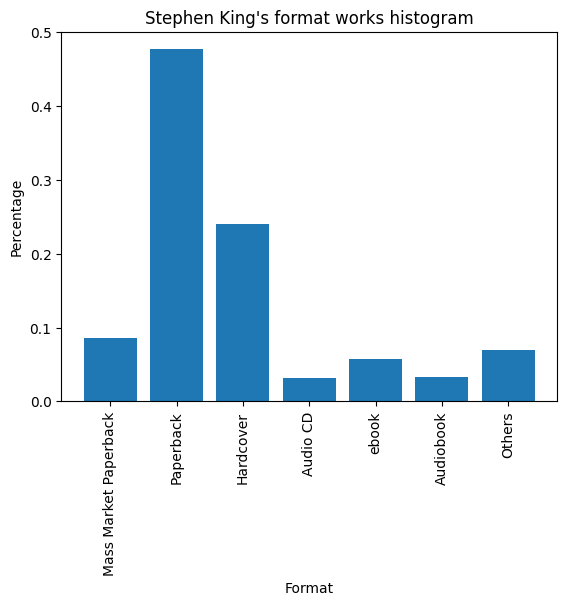

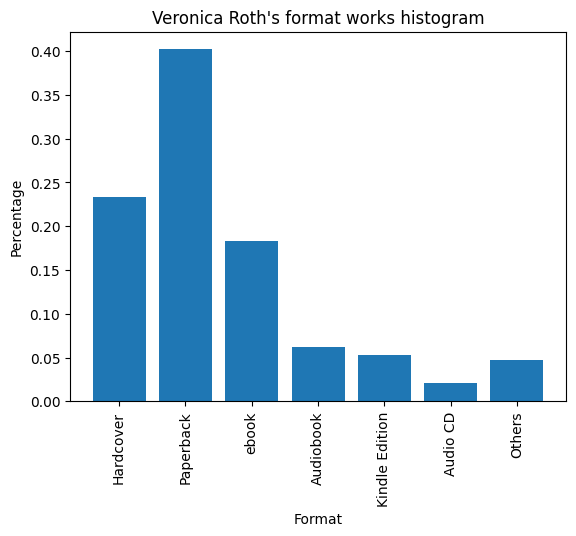

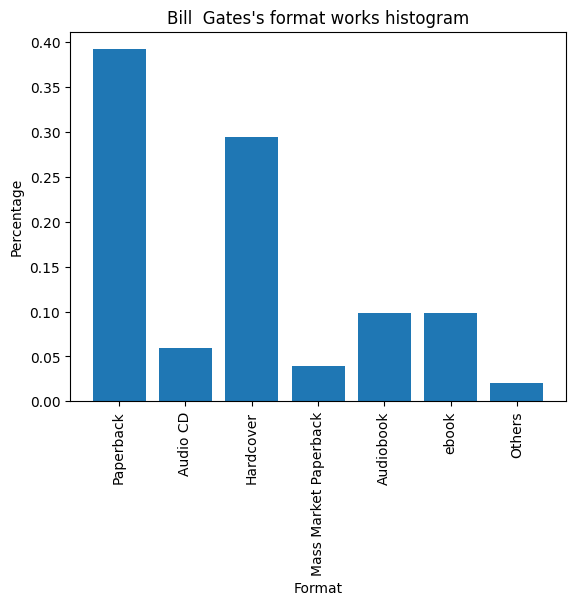

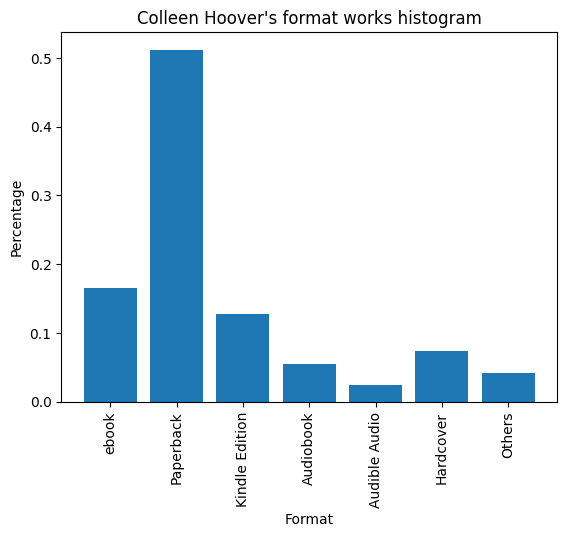

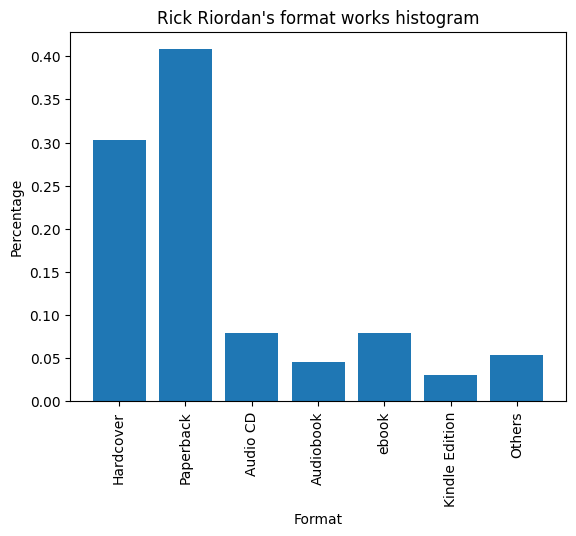

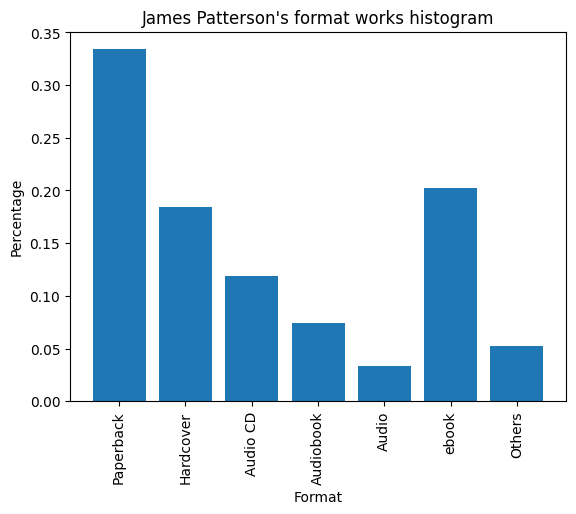

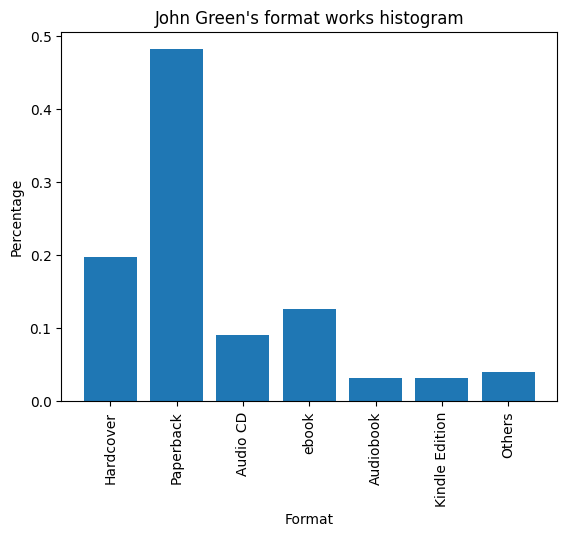

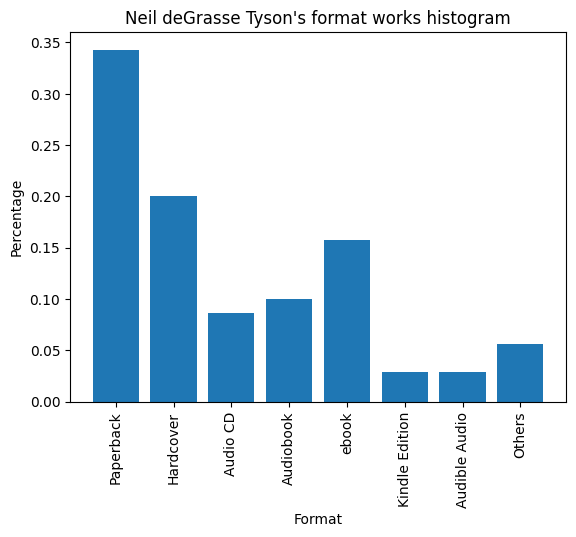

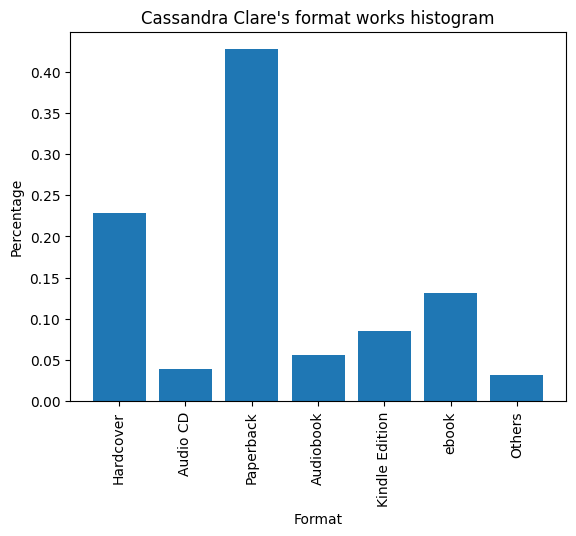

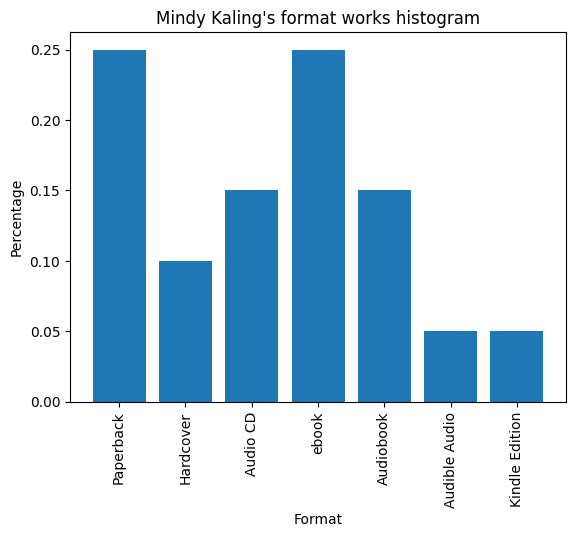

In [39]:
# To answer this question we use the original database and not "df_5_b_2" because we need to evaluate all kinds of formats published by an author,
# even if there are more formats for the same opera.

for i in most_influent_authors:
    sel_row = books_format.loc[books_format['author_id'] == most_influent_authors[i]]
    value_var = sel_row['format'].values
    app = Counter(value_var)
    count = 0
    new_dict = {}
    
    total = sum(app.values())
    
    for key in app:
        if app[key]/total < 0.02:
            count += np.round(app[key]/total, 3)
        else:
            new_dict[key] = np.round(app[key]/total, 3)
    
    if count != 0:
        new_dict['Others'] = count

    # print(f"{i} ha: {new_dict}")

    cat = new_dict.keys()  
    val = new_dict.values()   
    plt.bar(cat, val)

    # add labels
    plt.xlabel("Format")
    plt.ylabel("Percentage")
    plt.title(f"{i}'s format works histogram")
    plt.xticks(rotation = 90)
    
    # show the plot
    plt.show()

These graphs display the distributions of book formats for each of the most influential authors. To streamline the presentation, we have categorized all formats that represent less than 2% into a class labeled 'Others' to prevent an excessive number of different formats.


We can observe that the most prevalent formats are Paperback and Hardcover, followed by eBooks and Audiobooks. This highlights how paper has not yet been completely overtaken by digital formats and how people still appreciate purchasing books as they used to.

We can also notice that more recent authors tend to use digital publications, unlike older authors. Furthermore authors that has more series use more different formats.

* Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias”. You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

In [40]:
df_authors_10 = authors[authors['id'].isin(most_influent_authors.values())]

df_authors_10 = df_authors_10[df_authors_10['gender'] != ""]

## df_authors_10 = authors[authors['gender'].isin(['male', 'female'])]

grouped = df_authors_10.groupby('gender')

# Calculate mean, median, and standard deviation for each group
summary_stats = grouped.agg({
    'fans_count': ['mean', 'median', 'std'],
    'average_rating': ['mean', 'median', 'std'],
    'text_reviews_count': ['mean', 'median', 'std']
})

# Rename the columns for clarity
summary_stats.columns = ['fans_mean', 'fans_median', 'fans_sd',
                         'rating_mean', 'rating_median', 'rating_sd',
                         'reviews_mean', 'reviews_median', 'reviews_sd']

# Reset the index to make 'gender' a regular column
summary_stats.reset_index(inplace=True)

# Display the summary statistics
summary_stats
# df_authors_10

,gender,fans_mean,fans_median,fans_sd,rating_mean,rating_median,rating_sd,reviews_mean,reviews_median,reviews_sd
0,female,350183.666667,356633.0,108542.796289,4.176667,4.24,0.109697,311170.666667,277033.0,92774.129585
1,male,474140.333333,339346.0,253034.111792,4.113333,4.04,0.181475,432107.000000,354145.0,153512.672138


## [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

* Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?


To answer this question, we need to clean the 'series_position' column first. This is because some series have a sort of spin-off that contains more than one volume, and there are also some kinds of books that are not part of the main saga.

In [41]:
ids = list(most_influent_authors.values())

# Filter the original dataframe based on the ID's 
df_initial = df_5_b_2[df_5_b_2['author_id'].isin(ids)] 

Only considering books that are part of a series.

In [42]:
df_series = df_initial.dropna(subset=['opd_column_formatted', 'series_id', 'series_position']) # dropping all the books that are not part of a series
df_series = df_series[df_series['series_id'] != ""]
df_series = df_series[df_series['series_position'] != ""]
len(df_series) # 368 books not belonging to a series

368

In [43]:
df_series = df_series.sort_values(by=['series_id', 'series_position'])

df_series['time_gap'] = df_series.groupby('series_id')['opd_column_formatted'].diff()

In [44]:
df_series['time_gap'] = df_series['time_gap'].astype(str) 
df_series['time_gap'] = df_series['time_gap'].replace('0:00:00', np.nan) # we are not considering time gaps equal to 0
df_series['time_gap'] = pd.to_timedelta(df_series['time_gap'])

media_timegap_series = df_series['time_gap'].mean()
print(f"Time gap between 2 consecutive publications of books belonging to a series is: {media_timegap_series.days} days")

Time gap between 2 consecutive publications of books belonging to a series is: 340 days


We found out the average time gap between two subsequent publications for a series of books is equal to **340 days**, equal to 1 year more or less.

Before delving into the solution of the other average time between two books not belonging to a series, it's important to an assumption.

We expect that there will be a shorter time gap between the consecutive publications of books within a series. This expectation is based on the likelihood that an author often works on multiple books within the same series simultaneously or begins working on the next one almost immediately after releasing the most recent installment. This is in contrast to two books that are not part of the same series, where we might expect longer intervals between their publications.

So let's create a new subset to analyze the time gap between two books not belonging to a series.


In [45]:
df_not_series = df_initial.drop(columns = ['series_position', 'original_publication_date']) # we work again on the original dataset because we need also the NA's series_id
df_not_series = df_not_series[df_not_series['series_id'] == ""]
df_not_series = df_not_series.sort_values(by=['author_id', 'opd_column_formatted'])

print(len(df_not_series)) # 447 books within a series

447


In [46]:
time_gap_books = df_not_series.groupby('author_id')['opd_column_formatted'].diff()
df_not_series['time_gap_books'] = time_gap_books
df_not_series['time_gap_books'] = df_not_series['time_gap_books'].replace(datetime.timedelta(0), pd.NaT) # we are not considering timedelta(0)
df_not_series['time_gap_books'] = df_not_series['time_gap_books'].replace(np.nan, pd.NaT)


In [47]:
# Let's finally compute the mean

a = datetime.timedelta(0)
conta = 0

for i in df_not_series['time_gap_books']:
    if str(type(i)) != "<class 'pandas._libs.tslibs.nattype.NaTType'>":
        a += i
        conta += 1

print(f"Time gap between 2 consecutive publications of books not belonging to a series is {(a/conta).days} days")

Time gap between 2 consecutive publications of books not belonging to a series is 204 days


Unexpected, the time gap between the release of two consecutive books, which are not part of a series, is **204 days**. Notably, this 204-day gap is approximately two-thirds of the time gap calculated for some other context.

############# COMMENTSSS #######

* For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


In [48]:
# Let's start by creating a new column of the subset with the year of the original publication of every book

df_6 = df_5_b_2[["author_id", "original_publication_date", "work_id"]]

df_6 = df_6[df_6['author_id'].isin(ids)]

opd_column = df_6["original_publication_date"]
year_of_publication = []

for i in opd_column:
    if len(i) in [4, 7, 10]:
        if len(i) == 4:
            i += "-01-01"

        if len(i) == 7:
            i += "-01"
        
        format = "%Y-%m-%d"
        timestamp_format = datetime.datetime.strptime(i, format)
        year_of_publication.append(timestamp_format.year)
    else:
        year_of_publication.append(pd.NaT)

df_6['opd_column_formatted'] = year_of_publication
df_6 = df_6.dropna(subset=['opd_column_formatted'])
df_6

,author_id,original_publication_date,work_id,opd_column_formatted
3114,3389,2003-11-04,2754911,2003
3178,3389,2004-09-21,6309701,2004
3179,3389,2002,6309704,2002
3180,3389,2004-06-08,1178083,2004
3181,3389,1987-05,2113248,1987
...,...,...,...,...
6982182,5430144,2015-04-28,45155963,2015
6987678,3389,1989-08-01,45175106,1989
6991456,4039811,2014-06-25,45187402,2014
6991641,4039811,2014-06-25,45188175,2014


######## COMMENTS #########

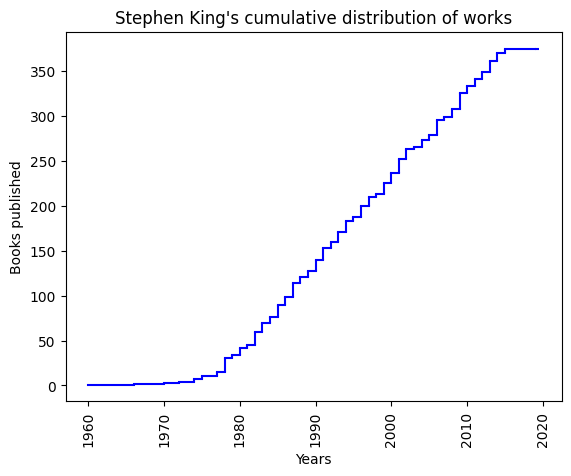

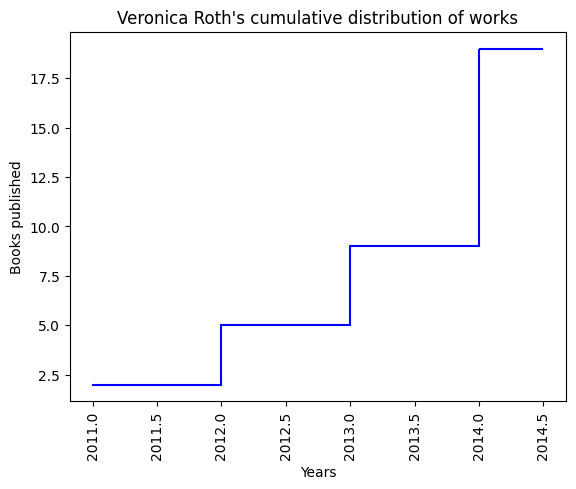

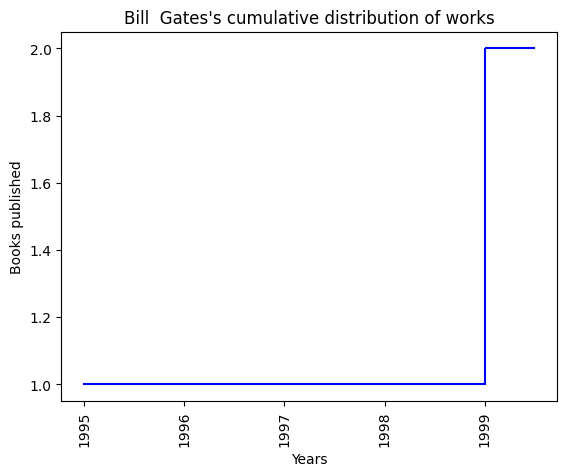

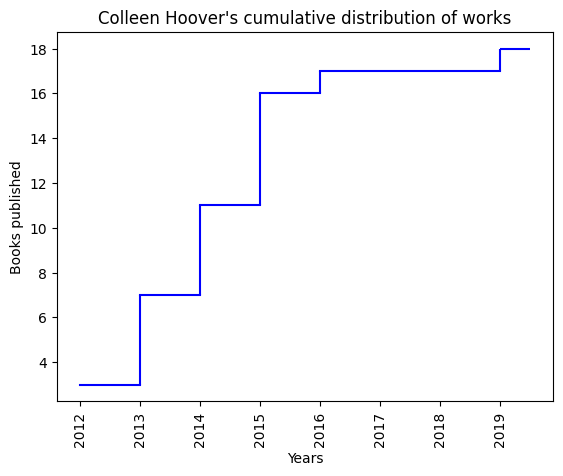

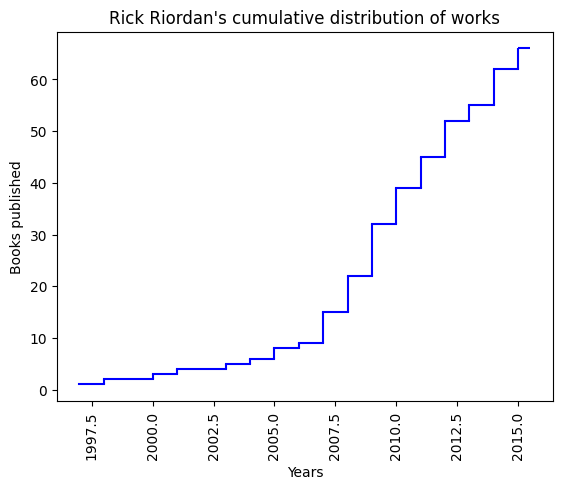

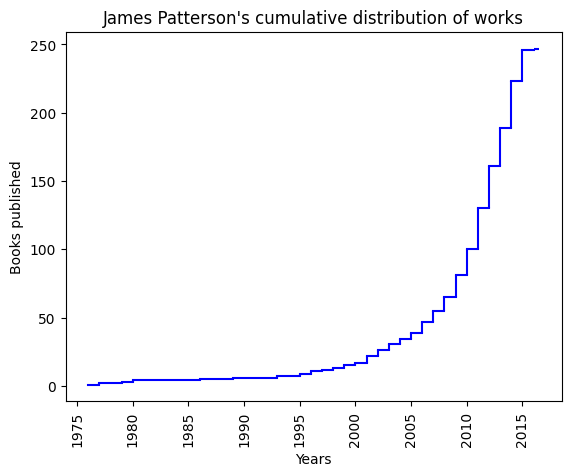

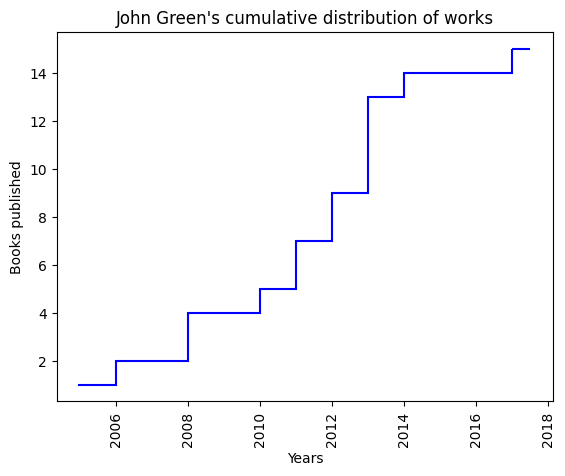

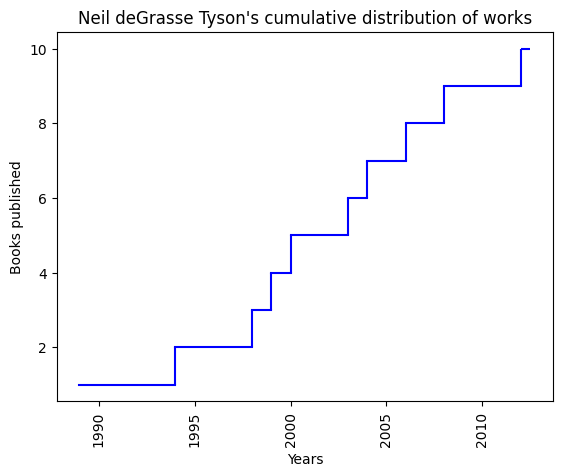

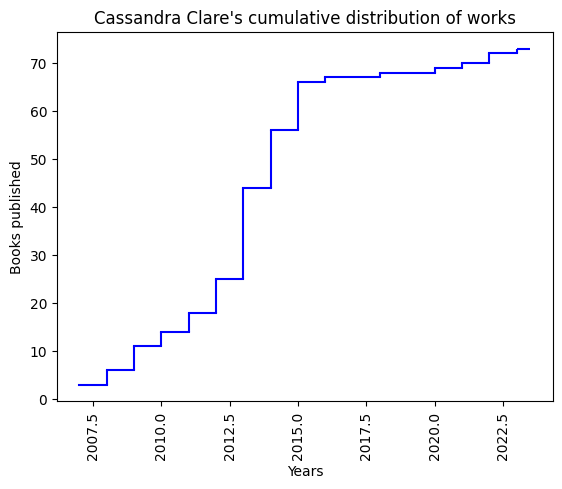

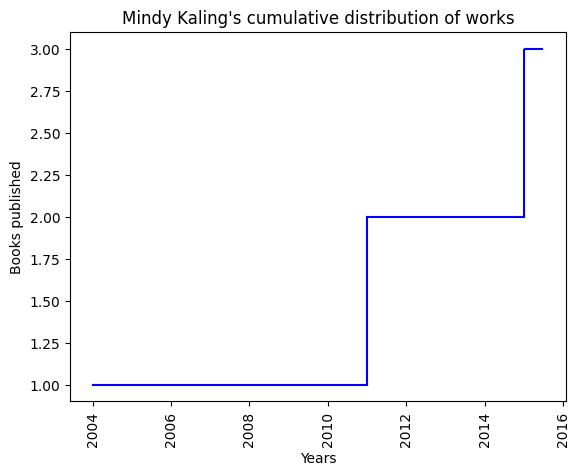

In [49]:
for i in most_influent_authors:
    row = df_6.loc[df_6['author_id'] == most_influent_authors[i]]
    vv = row['opd_column_formatted'].values
    app = Counter(vv)
    count = 0
    
    # print(f"{i} ha: {app}")

    cat = sorted(app.keys())
    val = app.values()
    cumulative_hist = []
    i_esimo = 0
    
    for year in cat:
        i_esimo += app[year]
        cumulative_hist.append(i_esimo)
            
        
    # print(cat, cumulative_hist)
    # plt.bar(cat, cumulative_hist)
    
    for j in range(len(cumulative_hist) - 1):
        plt.plot([cat[j], cat[j + 1]], [cumulative_hist[j], cumulative_hist[j]], color='b', linestyle='-')

    plt.hlines(cumulative_hist[-1], cat[-1], cat[-1] + 0.5, colors='b', linestyles='-')

    # add labels
    plt.xlabel("Years")
    plt.ylabel("Books published")
    plt.title(f"{i}'s cumulative distribution of works")
    plt.xticks(rotation = 90)
    for j in range(1, len(cumulative_hist)):
        plt.vlines(cat[j], cumulative_hist[j-1], cumulative_hist[j], colors='b', linestyles='-')

    # show the plot
    plt.show()
    

We have chosen to represent the cumulative distribution of published books using the ECDF (Empirical Cumulative Distribution Function) without normalization. This approach allows us to visualize the publication distribution up to a specific year more effectively.


It seems that all these authors are roughly contemporary with each other. Some, like Stephen King, have had long careers spanning from 1960 to the present day, while others, such as Bill Gates, have only published a few books. Their book production appears to be more consistent during the first two decades of the 2000s.

## BONUS POINTS
***1.***
Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. 

Do the same using Pandas and compare performance in terms of milliseconds.

In [51]:
start_time = time.time()

file_path = "./lighter_authors.json"

# Read the JSON file into a Dask DataFrame
df_9 = dd.read_json(file_path)

# Filter authors with at least 100 reviews
result = df_9[df_9['text_reviews_count'] >= 100]
end_time = time.time()

# Print the result and the time taken in milliseconds
result
print(f"Time taken using Dask: {(end_time - start_time) * 1000} ms")


Time taken using Dask: 14483.048915863037 ms


In [52]:
start_time = time.time()

file_path = "./lighter_authors.json"

# Read the JSON file into a Dask DataFrame
df_9 = pd.read_json(file_path, lines = True)

# Filter authors with at least 100 reviews
result = df_9[df_9['text_reviews_count'] >= 100]
end_time = time.time()

# Print the result and the time taken in milliseconds
result
print(f"Time taken using Pandas: {(end_time - start_time) * 1000} ms")

Time taken using Pandas: 9984.313488006592 ms


Uploading file "lighter_authors" and filtering authors with more than 100 reviews lasts about one half using Pandas instead of Dask, **32262 ms** against **13582 ms**.
So for this kind of operations is more convenient using the first library.

***2*** Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?

In [ ]:
##### DO NOT RUN ####
file_path_1 = "./lighter_authors.json"
file_path_2 = "./lighter_books.json"

# Read the "books.json" and "authors.json" datasets into Dask DataFrames
books_df = dd.read_json(file_path_2)
authors_df = dd.read_json(file_path_1)

# Perform the inner join on 'author_id'
joined_df = dd.merge(books_df, authors_df, on='author_id', how='inner')

# Find the number of books without a matching author
books_without_author = len(books_df) - len(joined_df)
print(f"Number of books without a matching author: {books_without_author.compute()}")


In [ ]:
light_authors = ".\lighter_authors.json"
ch_size = 100
dfs = []

# to import only some columns
with open(light_authors, "r") as file:
        for ch in pd.read_json(file, lines = True, chunksize = ch_size):
                ch = ch[["name", "works_count","ratings_count","average_rating",
"text_reviews_count", "work_ids", "book_ids","id",
"gender",
"about","fans_count"]]
        dfs.append(ch)

la = pd.concat(dfs, ignore_index = True)

## [RQ7]  Estimating probabilities is a core skill for a data scientist: show us your best!

* Estimate the probability that a book has over 30% of the ratings above 4.

In [59]:
lighter_books = ".\lighter_books.json"
ch_size = 100
dfbs = []

# we import the dataset
with open(lighter_books, "r") as fileb:
    rows_read = 0
    for chb in pd.read_json(fileb, lines = True, chunksize = ch_size):
        chb = chb[["id", "title", "author_name","author_id", "work_id",
"language","average_rating","rating_dist","ratings_count","text_reviews_count","publication_date",
"original_publication_date", "format","edition_information","publisher","num_pages",
"series_id","series_name","series_position"]]
        dfbs.append(chb)
#       Update the count of rows read
        rows_read += len(chb)
        
        # Check if we have read 10,000 rows, and if so, break the loop
        if rows_read >= 100000:
            break
            
#final data with our books
lb = pd.concat(dfbs, ignore_index = True)

In [66]:
#we chose the data we want to study, in this case lighter_books
dr = books[['rating_dist','ratings_count']]

#we change rating_dist to str to be able to separate the values of each rating
dr['rating_dist'] = dr['rating_dist'].astype(str)


#we define a function to separate the ratings we want
def parse_rating_dist(rating_dist):
    match = re.search(r'5:(\d+)', rating_dist)
    if match:
        ratings_5 = int(match.group(1))
    else:
        ratings_5 = 0

    match = re.search(r'4:(\d+)', rating_dist)
    if match:
        ratings_4 = int(match.group(1))
    else:
        ratings_4 = 0  

    return ratings_4, ratings_5

# Apply the parsing function
dr['ratings_4'], dr['ratings_5'] = zip(*dr['rating_dist'].map(parse_rating_dist))



# Calculate the probability
dr['proportion_above_4'] = (dr['ratings_4'] + dr['ratings_5']) / dr['ratings_count']


# Estimate the probability
probability_above_30_percent = (dr['proportion_above_4'] > 0.30).mean()

print(probability_above_30_percent)

print(f"Estimated probability that a book has over 30% of ratings above 4: {probability_above_30_percent:.2%}")
pr = 0
for i in range(0,len(dr)):
    if dr['proportion_above_4'] [i] > 0.30:
        pr += 1
print('The probability to have over 30% of above 4 is',pr/(len(dr))*100,'%')


C:\Users\ricca\AppData\Local\Temp\ipykernel_32992\905161900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['rating_dist'] = dr['rating_dist'].astype(str)
C:\Users\ricca\AppData\Local\Temp\ipykernel_32992\905161900.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['ratings_4'], dr['ratings_5'] = zip(*dr['rating_dist'].map(parse_rating_dist))
C:\Users\ricca\AppData\Local\Temp\ipykernel_32992\905161900.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

0.6170104476057475
Estimated probability that a book has over 30% of ratings above 4: 61.70%


KeyError: 7

* Estimate the probability that an author publishes a new book within two years from its last work.

In [ ]:

# we get the columsn we'll need
dt = lb[['title','author_id','publication_date','original_publication_date']]

# we change the  datetime to be able touse it more easily
dt['original_publication_date'] = pd.to_datetime(dt['original_publication_date'], errors='coerce')

dt.sort_values(by=['author_id', 'original_publication_date'], ascending=True, inplace=True)
print(dt)
# Calculate time gaps
dt['time_gap'] = dt.groupby('author_id')['original_publication_date'].diff()
print(dt)

# Handle invalid (out-of-bounds) dates by replacing them with the previous work's publication date
dt['original_publication_date'] = dt.groupby('author_id')['original_publication_date'].fillna(method='ffill')
print(dt)

# Filter the data
filtered_data = dt.dropna(subset=['original_publication_date', 'time_gap'])
print(filtered_data)
filtered_data = filtered_data[filtered_data.groupby('author_id')['author_id'].transform('size') > 1]
print(filtered_data)
# Calculate the probability
probability_within_two_years = dt.groupby('author_id')['time_gap'].apply(lambda x: (x <= timedelta(days=730)).any()).mean()

print(f"Estimated probability that an author publishes a new book within two years from their last work: {probability_within_two_years:.2%}")


* In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [ ]:
file_path = "list.json"
ch_size = 100
dfls = []

# to import only some columns
with open(file_pathl, "r") as filel:
    rows_read = 0
    for chl in pd.read_json(filel, lines = True, chunksize = ch_size):
        chl = chl[["id",
"title",
"description","description_html","num_pages",
"num_books",
"num_voters",
"created_date",
"tags",
"num_likes",
"created_by",
"num_comments",
"books"]]
        dfls.append(chl)
#          Update the count of rows read
        rows_read += len(chl)
        
        # Check if we have read 10,000 rows, and if so, break the loop
        if rows_read >= 100000:
            break

dfl = pd.concat(dfls, ignore_index = True)

In [ ]:
import pandas as pd

lb['num_pages'] = pd.to_numeric(lb['num_pages'], errors='coerce')  # Convert to integers and handle errors
books_with_more_than_700_pages = lb[lb['num_pages'] > 700]

# Step 2: Identify books in "The Worst Books of All Time" list
# Assuming 'list' contains information about the list, extract the relevant book titles from it
rs = dfl[dfl['title'] == "The Worst Books of All Time"]

# Extract the titles of the books in the list

# Create a new Series containing book dictionaries
book_series = rs['books'].apply(lambda x: [item['title'] for item in x])

# Create a flattened list of titles
book_titles = [title for titles in book_series for title in titles]

# Step 2: Identify books in the extracted list
books_in_extracted_list = books_with_more_than_700_pages[books_with_more_than_700_pages['title'].isin(book_titles)]

# Step 3: Calculate the probability
total_books = len(books_with_more_than_700_pages)
books_in_list_count = len(books_in_extracted_list)

probability_in_list_given_700_pages = books_in_list_count / total_books

print(probability_in_list_given_700_pages)

In [ ]:
import pandas as pd

# Assuming 'lb' is a DataFrame containing book information
# 'list' is a DataFrame containing list information

# Step 1: Filter books with more than 700 pages from 'lb'
# Convert 'num_pages' to integers and then filter
lb['num_pages'] = pd.to_numeric(lb['num_pages'], errors='coerce')  # Convert to integers and handle errors
books_with_more_than_700_pages = lb[lb['num_pages'] > 700]

# Step 2: Identify books in "The Worst Books of All Time" list
# Assuming 'list' contains information about the list, extract the relevant book titles from it
worst_books_list = dfl[dfl['title'] == "The Worst Books of All Time"]

# Step 3: Calculate the probability
total_books = len(books_with_more_than_700_pages)
books_in_worst_list_count = len(worst_books_list)

probability_on_worst_list = books_in_worst_list_count / total_books

print(f"Estimated probability of a book being on 'The Worst Books of All Time' list, given it has more than 700 pages: {probability_on_worst_list:.2%}")


In [ ]:
# Calculate P(X), the probability of being in the list
total_books = len(books_with_more_than_700_pages)  # Number of books with more than 700 pages
books_in_worst_list_count = len(books_in_extracted_list)  # Number of books in the list

P_X = books_in_worst_list_count / total_books

# Calculate P(X|Y), the probability of being in the list given more than 700 pages
total_books_with_more_than_700_pages = len(books_with_more_than_700_pages)  # Total books with more than 700 pages
books_in_extracted_list_count = len(books_in_extracted_list)  # Number of books in the list with more than 700 pages
P_X_given_Y = books_in_extracted_list_count / total_books_with_more_than_700_pages

# Compare the probabilities
if P_X_given_Y == P_X:
    print("The events X and Y are independent.")
else:
    print("The events X and Y are dependent.")


In [ ]:
file_pathb = "lighter_books.json"
ch_size = 100
dfbs = []

# to import only some columns
with open(file_pathb, "r") as fileb:
    rows_read = 0
    for chb in pd.read_json(fileb, lines = True, chunksize = ch_size):
        chb = chb[["id", "title", "author_name","author_id", "work_id",
"language","average_rating","rating_dist","ratings_count","text_reviews_count","publication_date",
"original_publication_date", "format","edition_information","publisher","num_pages",
"series_id","series_name","series_position"]]
        dfbs.append(chb)
         # Update the count of rows read
        rows_read += len(chb)
        
        # Check if we have read 10,000 rows, and if so, break the loop
        if rows_read >= 100000:
            break

lb = pd.concat(dfbs, ignore_index = True)

In [ ]:
import pandas as pd
import scipy.stats as stats


# Load your dataset (replace 'your_dataset.csv' with your actual file)
dav = lb[['average_rating','num_pages']]

# Data preparation and cleaning
dav['average_rating'] = dav['average_rating'].astype(float)

# Remove rows with missing or empty 'num_pages' values
dav = dav[dav['num_pages'].str.strip() != '']
dav['num_pages'] = dav['num_pages'].astype(float)

# Define the book length groups
# You can customize the cutoffs for short, medium, and long books based on your data.
short = dav[dav['num_pages'] <= 150]
med = dav[(dav['num_pages'] > 150) & (dav['num_pages'] <= 700)]
long = dav[dav['num_pages'] > 700]

# Calculate summary statistics for average ratings
mean_short = short['average_rating'].mean()
mean_med = med['average_rating'].mean()
mean_long = long['average_rating'].mean()

# Perform hypothesis testing (e.g., ANOVA) to determine if there are significant differences
f_statistic, p_value = stats.f_oneway(short['average_rating'], med['average_rating'], long['average_rating'])

print(f"Mean rating for short books: {mean_short:.2f}")
print(f"Mean rating for medium books: {mean_med:.2f}")
print(f"Mean rating for long books: {mean_long:.2f}")

print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There are statistically significant differences in ratings between book length groups.")
else:
    print("There are no statistically significant differences in ratings between book length groups.")


We cannot demonstrate that usually readers rate the longest books as the worst, since as we just see is normally thte contrary, the longest the book the better ratings it gets

* Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load your dataset (replace 'your_dataset.csv' with your actual file)
deng = lb[['average_rating','language']]

# Data preparation
deng['average_rating'] = deng['average_rating'].astype(float)
deng['language'] = deng['language'].str.lower()  # Ensure uniform case for language comparison

# Split data into English and non-English books
eng = deng[deng['language'] == 'eng']
neng = deng[deng['language'] != 'eng']

meng=eng['average_rating'].mean()
mneng=neng['average_rating'].mean()

print(f"Mean rating for english books: {meng:.2f}")
print(f"Mean rating for non-english books: {mneng:.2f}")

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(eng['average_rating'], neng['average_rating'])

# Interpret the results
alpha = 0.05  # Significance level
print(f"p-value: {p_value:.4f}")
if p_value < alpha:
    print("There is a statistically significant difference in average ratings between English and non-English books.")
else:
    print("There is no statistically significant difference in average ratings between English and non-English books.")


The non-english books have a bit of a lower rating.

Lets go deepr in detail to compare.

In [ ]:
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
deng = lb[['average_rating','language']]

# Data preparation
deng['average_rating'] = deng['average_rating'].astype(float)
deng['language'] = deng['language'].str.lower()  # Ensure uniform case for language comparison

# Split data into English and non-English books
eng = deng[deng['language'] == 'eng']
neng = deng[deng['language'] != 'eng']

# Calculate descriptive statistics for each group
english_stats = eng['average_rating'].describe()
non_english_stats = neng['average_rating'].describe()

# Create box plots for each group
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(eng['average_rating'], vert=False)
plt.title('English Books')
plt.subplot(1, 2, 2)
plt.boxplot(neng['average_rating'], vert=False)
plt.title('Non-English Books')
plt.tight_layout()

# Print and interpret the statistics
print("Statistics for English Books:")
print(english_stats)
print("\nStatistics for Non-English Books:")
print(non_english_stats)
print(statistucs)


plt.show()

* It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [ ]:
file_path = "lighter_authors.json"
ch_size = 100
dfs = []

# to import only some columns
with open(file_path, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = ch_size):
        ch = ch[["name", "works_count","ratings_count","average_rating",
"text_reviews_count", "work_ids", "book_ids","id",
"gender",
"about","fans_count"]]
        dfs.append(ch)

la = pd.concat(dfs, ignore_index = True)

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load your dataset with author information, fans, and reviews
df = la[['fans_count','ratings_count']]
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df['fans_count'], df['ratings_count'])

print(f"Pearson Correlation: {correlation:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # Using a significance level of 0.05
    print("There is a statistically significant correlation between the number of fans and the number of reviews.")
else:
    print("There is no statistically significant correlation between the number of fans and the number of reviews.")


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Define the dependent and independent variables
X = df['fans_count']
# X = sm.add_constant(X)  # Add a constant for the intercept
y = df['ratings_count']

# Build a linear regression model
model = sm.OLS(y, X).fit()
# plt.plot(X,y,'.')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Add the linear regression line to the plot
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')

# Add labels and a legend
plt.xlabel('Number of Fans')
plt.ylabel('Number of Reviews')
plt.title('Relationship Between Number of Fans and Number of Reviews')
plt.legend()

# Show the plot
plt.show()

# Print the model summary
print(model.summary())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Linear regression line
coefficients = np.polyfit(X, y, 1)
linear_regression = np.poly1d(coefficients)
x_range = np.linspace(min(X), max(X), 100)
y_predicted = linear_regression(x_range)

# Plot the linear regression line
plt.plot(x_range, y_predicted, color='red', label='Linear Regression Line')

# Add labels and a legend
plt.xlabel('Number of Fans')
plt.ylabel('Number of Reviews')
plt.title('Relationship Between Number of Fans and Number of Reviews')
plt.legend()

correlation_coefficient = np.corrcoef(X, y)[0, 1]

# Show the plot
plt.show()

# Print the equation of the linear regression line
slope, intercept = coefficients
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(linear_regression)